
## Summary
1. Domain Introduction
2. Problem Statement
3. Data Description
4. Loading the data
5. Inspecting the data
6. Cohort Analysis: Retention Rate
  - Month Extraction from Inovicedate column
  - Assigning Cohort to Each Transaction
  - Assigning Cohort Index to each transaction
  - Calculating number of unique customers in each Group of (ChortDate,Index)
  - Creating Cohort Table for Retention Rate
  - Creating the Cohort Chart using the Cohort Table

7. Cohort Analysis: Total Revenue Generated
7. Cohort Analysis: Total Quantity Purchased
9. Conclusion



## 1. Domain Introduction: 
### Customer Segmentation:
Customer segmentation is the practice of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age, gender, interests and spending habits.

Customer segmentation relies on identifying key differentiators that divide customers into groups that can be targeted. Information such as a customer's: 

- Demographics (age, race, religion, gender, family size, ethnicity, income, education level)
- Geography (where they live and work)
- Psychographic (social class, lifestyle and personality characteristics) 
- Behavioral (spending, consumption, usage and desired benefits) tendencies 
are taken into account when determining customer segmentation practices.

In this Data Tale we will focus on behavioral Tendencies in order to group Customers into following two categories:
- Loyal Customers
- High Spending Customers


#### Cohort:
A cohort is a group of users sharing a particular characteristic. Strictly speaking it can be any characteristic, but typically the term cohort refers to a time-dependent grouping. For example, a typical cohort groups users by the week or month when they were first acquired. When speaking of groupings that are not time-dependent, the term segment is typically used instead of cohort.

#### Cohort Analysis:
Cohort analysis refers to tracking and investigating the performance of cohorts over time.

For example, if you wanted to see if users you’re acquiring now are more or less valuable than users you’ve acquired in the past, you can define cohorts by the month when they were first acquired. You can then run a cohort analysis to compare year-over-year revenue performance. You can also use cohort Analysis to group users/Customers.


#### Key Advantages of Cohort Analysis:

- Identify issues sooner: you may see disturbing trends in newer cohorts that would otherwise be masked by the rest of the user base until they affect enough cohorts for you to notice in top-line metrics

- Build more accurate forecasts: knowing seasonal behaviors, you can incorporate those into your expectations of future performance from that set of users
- Help understanding the customer behaviour, seasonality impact, and how business changes with Time

#### Cohort Analysis can answer questions like:


1. Are the new cohorts you’re acquiring more (or less) valuable than previous users?

2. Have changes you’ve made to your site impacted users who are new to your site?

3. Are there seasonal differences between users you acquire? 

4. What is the retention rate of your users?

5. What is the long term value of your users?

6. When do users start to churn?

## 2. Problem Statement
In this Data Tale, we will perform Time Cohort Analysis.
Time based Cohort analysis groups the customer by the time they completed their first activity.

The flow of this Analysis will be:
- Segment customers into cohorts based on the month they made their first purchase in.
-  We will then assign a cohort index to each purchase of all the customer. i.e we will mark each transaction based on that customers relative time period difference since his first purchase(Cohort he belongs to).
- Cohort Index assigned  will represent months since the 1st transaction of that particular customer.

- In the Last step, we will calculate various business metrics such as retention rate or Revenue Generated with respect to each Cohort or Quantity Purchased with respect to each Cohort and build a Cohort Chart using Heatmap to represent the results.


## 3. Data Desription:
#### About the dataset.
We will use a randomly subsampled subset of the very popular transactional dataset provided by UCI machine Learning Laboratory.


**Data Set Information:**

This is a transactional data set which contains the transactions occurring between 01/12/2010 and 09/12/2011 for the UK-based a ndregistered non-store online retail firm and contains realistic customer Transaction information in a commonly used format in Industry.


#### Information related to attributes of Dataset is:

- **InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. 
- **StockCode**: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
- **Description**: Product (item) name. Nominal. 
- **Quantity**: The quantities of each product (item) per transaction. Numeric.
- **InvoiceDate**: Invice Date and time. Numeric, the day and time when each transaction was generated. 
- **UnitPrice**: Unit price. Numeric, Product price per unit in sterling. 
- **CustomerID**: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
- **Country**: Country name. Nominal, the name of the country where each customer resides.

## 4. Loading the Dataset:

Let's import pandas and numpy libaries to perform necessary calculations.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#creating a directory
!mkdir ~/.kaggle
#using credentials to open kaggle dataset
import json
token = {"username":"enter your kaggle username","key":"enter your kaggle user key"}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!cp /root/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
#downloading the zipped dataset folder on cloud
!kaggle datasets download -d mrmining/online-retail -p /content    

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: '/root/.kaggle/kaggle.json' and '/root/.kaggle/kaggle.json' are the same file
- path is now set to: {/content}
online-retail.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#unzipping the folder
!unzip \*.zip

Archive:  online-retail.zip
replace Online Retail.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
# Reading transaction.csv into a dataframe with invoice column parsed as DateTime type instead of Object(string) and '0' column as Index
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# dropping duplicate values
df.drop_duplicates(keep='first',inplace=True)
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,Revenue
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,15.30
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,22.00
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34


The dataset contains 7 columns for each customer transaction representing variuos features of a transaction.

For time cohort analysis, we will use:
- DateTime column
- Price Column
- CustomerID column.

The dataset has been loaded. 
Let's understand more about the dataset in next section.






## 5. Inspecting the Data

Let's check the information related to datatypes and Columns in Data Set

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     536641 non-null  object        
 1   StockCode     536641 non-null  object        
 2   lower         1780 non-null    object        
 3   Description   535187 non-null  object        
 4   Quantity      536641 non-null  int64         
 5   InvoiceDate   536641 non-null  datetime64[ns]
 6   UnitPrice     536641 non-null  float64       
 7   CustomerID    401604 non-null  float64       
 8   Country       536641 non-null  object        
 9   InvoiceMonth  536641 non-null  datetime64[ns]
 10  CohortMonth   401604 non-null  datetime64[ns]
 11  CohortIndex   401604 non-null  float64       
 12  Revenue       536641 non-null  float64       
dtypes: datetime64[ns](3), float64(4), int64(1), object(5)
memory usage: 57.3+ MB


- There are 8 atttributes and 70864 Data Points in our Data Set.
- 4 of them are numeric while one is Data Type and 3 are Object types.
- There is no Missing Value in any of the Columns.

Let's Move ahead and check the Numerical Variables:


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID,CohortIndex,Revenue
count,536641.000000,536641.000000,401604.000000,401604.000000,536641.000000
mean,9.620029,4.632656,15281.160818,5.187227,18.123861
std,219.130156,97.233118,1714.006089,3.856358,380.656263
min,-80995.000000,-11062.060000,12346.000000,1.000000,-168469.600000
25%,1.000000,1.250000,13939.000000,1.000000,3.750000
50%,3.000000,2.080000,15145.000000,4.000000,9.870000
75%,10.000000,4.130000,16784.000000,8.000000,17.400000
max,80995.000000,38970.000000,18287.000000,13.000000,168469.600000


Also Checking unique CustomerID's and Date Range

In [ ]:
df.CustomerID.nunique()

4372

In [ ]:
print('Min:{}; Max:{}'.format(min(df.InvoiceDate),max(df.InvoiceDate)))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:50:00


## 6. Cohort Analysis: Retention Rate
Since, We will be performing Cohort Analysis based on Transaction records of Customers, we will be Dealing with Mainly:
- Invoice Data
- CustomerID
- Price 
- and Quantity columns in this Analsyis.

The Following steps will performed to generate the Cohort Chart of Retention Rate :
- **Month Extraction from InvioceDate column**
- **Assigning Cohort to Each Transaction**
- **Assigning Cohort Index to each transaction**
- **Calculating number of unique customers in each Group of (ChortDate,Index)**
- **Creating Cohort Table for Retention Rate**
- **Creating the Cohort Chart using the Cohort Table**

The Detailed information about each step is given below:


### Step 1: Let's extract the Month of the Purchase of each transaction.

#### First we will create a function, which takes any date and returns the formatted date with day value as 1st of the same month and Year.

In [ ]:
# importing DateTime module to convert extracted dates
import datetime as dt

# Defining the function that will parse the date and return 1st day of respective month
def extract_month(date_value):
  return dt.datetime(date_value.year, date_value.month, 1)

#### Now we will use the function created above to convert all the invoice dates into respective month date format.

In [ ]:
# Creating InvoiceMonth column using the function created in previous step
df['InvoiceMonth'] = df['InvoiceDate'].apply(extract_month) 
df[['InvoiceDate','InvoiceMonth']].head()

,InvoiceDate,InvoiceMonth
0,2010-12-01 08:26:00,2010-12-01
1,2010-12-01 08:26:00,2010-12-01
2,2010-12-01 08:26:00,2010-12-01
3,2010-12-01 08:26:00,2010-12-01
4,2010-12-01 08:26:00,2010-12-01


### Step 2: Now we will use the Invoice Month created in step1 to generate cohort Date values

####  Creating a groupby object with respect to CustomerID variable, and selecting InvoiceDay for further calculations.

In [ ]:
group = df.groupby('CustomerID')['InvoiceMonth']

#### Now let's assign the acquistion Cohort value to each transaction based on the minimum value of InvoiceMonth of the group it belongs to.

In [ ]:
df['CohortMonth'] = group.transform('min')
df[['CustomerID','InvoiceDate','InvoiceMonth', 'CohortMonth']].head()

,CustomerID,InvoiceDate,InvoiceMonth,CohortMonth
0,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01
1,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01
2,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01
3,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01
4,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01


### Step 3: Calculating time offset in Months i.e. Cohort Index:
Calculating time offset for each transaction will allows us to report the metrics for each cohort in a comparable fashion.

First, we will create 4 variables that capture the integer value of years, months  for Invoice and Cohort Date using the get_date_int() function given below:



In [ ]:
def parse_dates_int(date_column):
    year = date_column.dt.year
    month = date_column.dt.month
    
    return year, month


#### We will use this function to extract the integer values for Invoice as well as Cohort Date in 3 seperate series for each of the two columns


In [ ]:
# Get the integers for date parts from the `InvoiceDay` column
invoice_year, invoice_month = parse_dates_int(df['InvoiceDate'])

# Get the integers for date parts from the `CohortDay` column
cohort_year, cohort_month = parse_dates_int(df['CohortMonth'])

# Printing top 5 of each series
cohort_year.head(), cohort_month.head()

(0    2010.0
 1    2010.0
 2    2010.0
 3    2010.0
 4    2010.0
 Name: CohortMonth, dtype: float64, 0    12.0
 1    12.0
 2    12.0
 3    12.0
 4    12.0
 Name: CohortMonth, dtype: float64)

Now, we have 4  pandas series containing year, month and day values for Invoice and Cohort dates columns as: - **invoice_year, cohort_year, invoice_month and cohort_month** respectively.

#### We will use the integer values extracted above to calculate business metrics for our time cohorts:
- We will calculate the difference between the Invoice Dates and Cohort dates in years, months separately.
- then calculate the total Months difference between the two. 
- This will be our Months offset or cohort Index, which we will use in the next section to calculate retention rate.

In [ ]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Calculate difference in days
# days_diff = invoice_day - cohort_day

# Using the variables created above to calcualte the difference in days and storing them in cohort Index column
df['CohortIndex'] = years_diff * 12 + months_diff+ 1

In [ ]:
df[['CustomerID','InvoiceDate','InvoiceMonth', 'CohortMonth', 'CohortIndex']].head()

,CustomerID,InvoiceDate,InvoiceMonth,CohortMonth,CohortIndex
0,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01,1.0
1,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01,1.0
2,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01,1.0
3,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01,1.0
4,17850.0,2010-12-01 08:26:00,2010-12-01,2010-12-01,1.0


We have  assigned the Monthly time offset i.e Cohort Index to each transaction and ready to use it for running daily cohort analysis!

### Step 4: Calculating Retention Count: 
The percentage of active customers compared to the total number of customers after a specific time interval is called retention rate.

In the this section, we will calculate retention count for each cohort Month paired with cohort Index

#### First, We will group by our dataset with respect to CohortMonth and CohortIndex first

In [ ]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])

#### Now we will count number of unique customer Id's falling in each group of CohortMonth and CohortIndex.
This will give us number of customers(Retained Customers) from  each cohort who bought items after a n Months where n is CohortIndex.

and store them in a new dataframe cohort Data.

In [ ]:
# Counting the number of unique values per customer ID in each group and storing in a Dataframe
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Assigning column names to the dataframe created above
cohort_data.columns = ['CohortMonth',	'CohortIndex',	'Count of unique CustomerID']

# Printing top 5 rows of Dataframe
cohort_data.head()

,CohortMonth,CohortIndex,Count of unique CustomerID
0,2010-12-01,1.0,948
1,2010-12-01,2.0,362
2,2010-12-01,3.0,317
3,2010-12-01,4.0,367
4,2010-12-01,5.0,341


### Step 5: Retention Rate calculation:
Now that we have count of retained customer for each cohortMonth and cohortIndex
let's convert it into suitable format for readability and Calulation of retention Rate for each Cohort.

We will create a pivot table for this purpose.
Given below is a cheat sheet to help you with Pivot Tables in Pandas:

In [ ]:
# Creating new dataframe with index as CohortMonth, columns as Cohort indexes and Values as Count
retention_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Count of unique CustomerID')

# Printing top 5 rows of Pivoted dataframe
retention_counts.head()


CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN


#### Now we will use the the Cohort Count dataframe to calculate the retention rate
- We will store the 1st column as Cohort size i.e total Number of Customers in that Cohort
- We will divide the values in other columns with Cohort Size in order to calculate the retention rate i.e Number of Customers in Each Cohort Index

In [ ]:
# Select the first column and store it to cohort_sizes
cohort_sizes = retention_counts.iloc[:,0]

Now we will divide the values in all the columns with values in Column 1 Row-Wise

In [ ]:
# Divide the cohort count by cohort sizes along the rows
retention_rate = retention_counts.divide(cohort_sizes, axis=0)

# Coverting the retention rate into percentage and Rounding off.
retention_rate

# printing top 5 rows of retention Rate
retention_rate.round(3)*100

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The retention Rate dataframe represent Customer retained across Cohurts. We can read it as following:
- Index value represents the Cohort
- Columns represent the number of months since current Cohort
- for example the value at index `2010-12-01` column `7` is 38.0 and Represents `38%` of customers from cohort `2010-12` were retained in `7th` Month.


#### Also you can see from the retention Rate DataFrame:
-  Retention Rate 1st index i.e 1st month is 100%  as all the customers for that particular customers signed up in 1st Month
- Retention Rate may increase or decrease in Subsequent Indexes.
- Values towards BottomRight have a lot of NaN values

***Why are there NaN values towards RIGHT BOTTOM ?***

Yes, As you might have Guessed, The Cohort Indexes towards Right represent Number of Months away the Values are from Current Cohort.
Thus the values at Bottom Right cells don't have data of acquisition as they are too recent

### Step 6: Visualizing the Above Retention rate
- Visualzation allows decision makers to read and interpret patterns in data easily. 
- This allows the organisation to act identify and Act on Trends Faster
- In this section, we will visualize cohort analysis using HeatMap as it is very easy to read and Contains color Mapping representing the Values

Before we starting plotting our HeatMap, let's set the index of our Retention rate dataframe to a more readable string format

In [ ]:
retention_rate.index = retention_rate.index.strftime('%Y-%m')
retention_rate.index

Index(['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
       '2011-12'],
      dtype='object', name='CohortMonth')

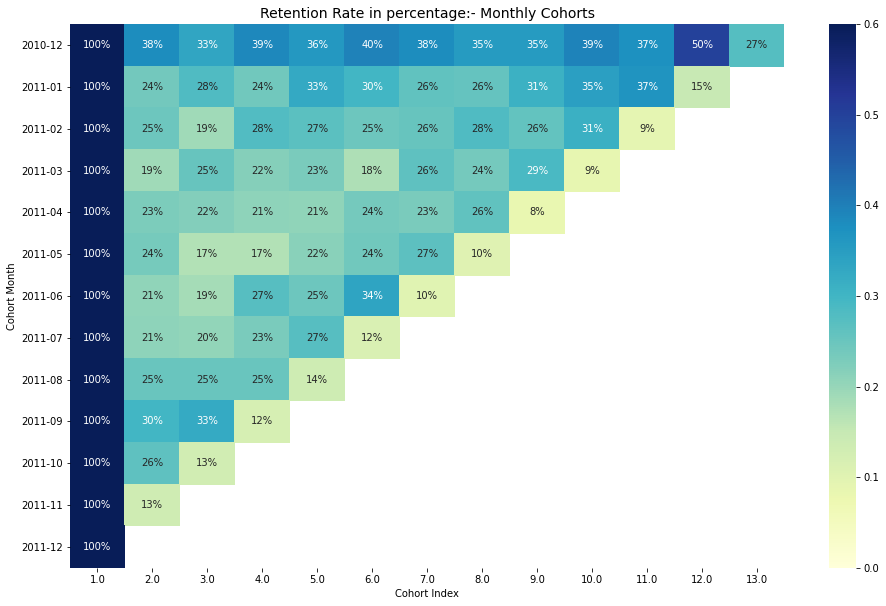

In [ ]:
#loading seaborn and matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the figure
plt.figure(figsize=(16, 10))

# Adding a title
plt.title('Retention Rate in percentage:- Monthly Cohorts', fontsize = 14)

# Creating the heatmap
sns.heatmap(retention_rate, annot=True, fmt= '.0%',cmap='YlGnBu', vmin = 0.0 , vmax = 0.6)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()


This marks the end of Cohort Analysis for Retention Rate of Customers.


The Heatmap generated can be used to present the cohort Analysis result to Decision Makers and Executives in order to generate insights and Take actions

As we discussed at the start of this Analysis, Cohort Analytics can be used not only for performing Customer Retention rate but also many other business metrics.

In this section, we will use it to genrate cohort Chart for two more metrics: Total Revenue Generated by each Cohort and Total Quantity purchased in each cohort.
## 7. Cohort Analysis: Total Revenue Generated.
#### Calculating Total revenue generated
I will now calculate the average revenue generated and in order to analyze trends and insights across all Monthly cohorts.



In [ ]:
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,Revenue
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,15.30
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,22.00
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0,20.34


We will first calculate revenue for each order by multiplying the Quantity with UnitPrice

In [ ]:
df['Revenue'] = df['UnitPrice']*df['Quantity']

Now I will:
- Create the groupby object using CohortMonth and CohortIndex columns.
- Select the Revenue Column, calculate the sum of Revenue for each Group, and store it to cohort_data.
- Reset the index of cohort_data DataFrame.
- and Finally, Create the pivot table with CohortMonth as the index, Cohort index as the columns and revenue for each group as the values.

In [ ]:
# Creating the groupby object and passing the CohortDate and cohort index as a list
grouping = df.groupby(['CohortMonth', 'CohortIndex']) 

# Calculating the sum of the Revenue price column
cohort_data = grouping['Revenue'].sum()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Revenue')
pd.set_option('display.max_columns',15)
print(average_price.round(1))

CohortIndex      1.0       2.0       3.0       4.0       5.0       6.0   \
CohortMonth                                                               
2010-12-01   552372.9  271081.1  230416.2  301779.4  200555.5  321097.9   
2011-01-01   202650.9   56012.5   62153.7   41454.9   82189.0   83890.3   
2011-02-01   149105.4   25154.7   37286.3   45768.9   35608.0   31016.1   
2011-03-01   189488.4   26364.1   53594.9   40246.5   46495.1   38301.9   
2011-04-01   119561.8   28866.8   24896.6   23863.4   25945.5   29550.2   
2011-05-01   115494.3   17622.9   18838.6   17888.9   26482.3   32850.3   
2011-06-01    92198.4   13552.7   13842.4   29868.8   25751.1   39494.5   
2011-07-01    65734.5   11126.3   15349.9   17063.0   18973.8    6024.7   
2011-08-01    77503.3   19093.3   33016.1   39870.9   14143.2       NaN   
2011-09-01   152935.4   25656.6   35663.2   12265.8       NaN       NaN   
2011-10-01   153634.1   38874.6   12225.6       NaN       NaN       NaN   
2011-11-01   132770.6   1

In [ ]:
#creating cohorts for total revenue
average_price.round(3)*100
average_price.index = average_price.index.strftime('%Y-%m')
average_price.index

Index(['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
       '2011-12'],
      dtype='object', name='CohortMonth')

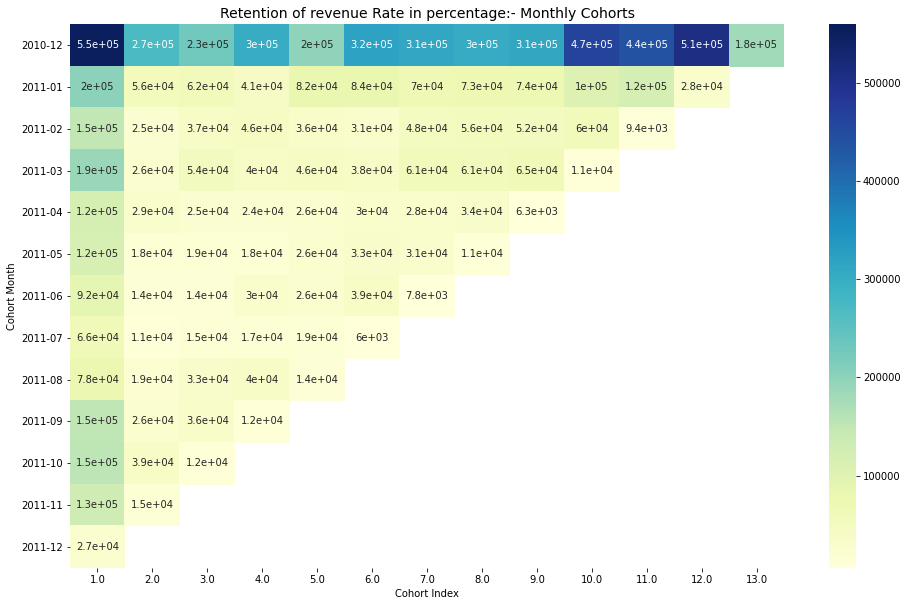

In [ ]:
# Initialize the figure
plt.figure(figsize=(16, 10))

# Adding a title
plt.title('Retention of revenue Rate in percentage:- Monthly Cohorts', fontsize = 14)

# Creating the heatmap
sns.heatmap(average_price, annot=True,cmap='YlGnBu', vmin = 6000 , vmax = 560000)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()


We can see the values of Total revenue generated by customers acquired in each Cohort across cohort Indexes as above.

## 8. Cohort Analysis: Total Quantity Purchased.
#### Calculating Total quantity purchased
I will now calculate the average quantity purchased and in order to analyze trends and insights across all Monthly cohorts.



In [ ]:
# Creating the groupby object and passing the CohortDate and cohort index as a list
grouping = df.groupby(['CohortMonth', 'CohortIndex']) 

# Calculating the sum of the Revenue price column
cohort_data = grouping['Quantity'].sum()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')
pd.set_option('display.max_columns',15)
print(quantity.round(1))

CohortIndex      1.0       2.0       3.0       4.0       5.0       6.0   \
CohortMonth                                                               
2010-12-01   295177.0  158672.0  137366.0  178851.0  130429.0  180391.0   
2011-01-01   110083.0   30020.0   37848.0   25893.0   46709.0   49190.0   
2011-02-01    94857.0   17936.0   35494.0   29144.0   24635.0   23424.0   
2011-03-01   108460.0   14659.0   30464.0   22437.0   31629.0   26137.0   
2011-04-01    71255.0   14466.0   12498.0   15039.0   16001.0   17106.0   
2011-05-01    65941.0   10125.0   12341.0   10861.0   16219.0   20261.0   
2011-06-01    58156.0   12751.0    7630.0   20036.0   17603.0   24248.0   
2011-07-01    48727.0    6668.0    9644.0   10744.0   10892.0    3698.0   
2011-08-01    47550.0    9567.0   15330.0   16587.0    6317.0       NaN   
2011-09-01    99265.0   13517.0   20530.0    7711.0       NaN       NaN   
2011-10-01    99281.0   25113.0    7199.0       NaN       NaN       NaN   
2011-11-01    96766.0   1

Now I will:
- Create the groupby object using CohortMonth and CohortIndex columns.
- Select the Quntity Column, calculate the sum of Quantity purchased for each Group, and store it to cohort_data.
- Reset the index of cohort_data DataFrame.
- and Finally, Create the pivot table with CohortMonth as the index, Cohort index as the columns and purchased quantity for each group as the values.

In [ ]:
#creating cohorts for total quantity
quantity.round(3)*100
quantity.index = quantity.index.strftime('%Y-%m')
quantity.index

Index(['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
       '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11',
       '2011-12'],
      dtype='object', name='CohortMonth')

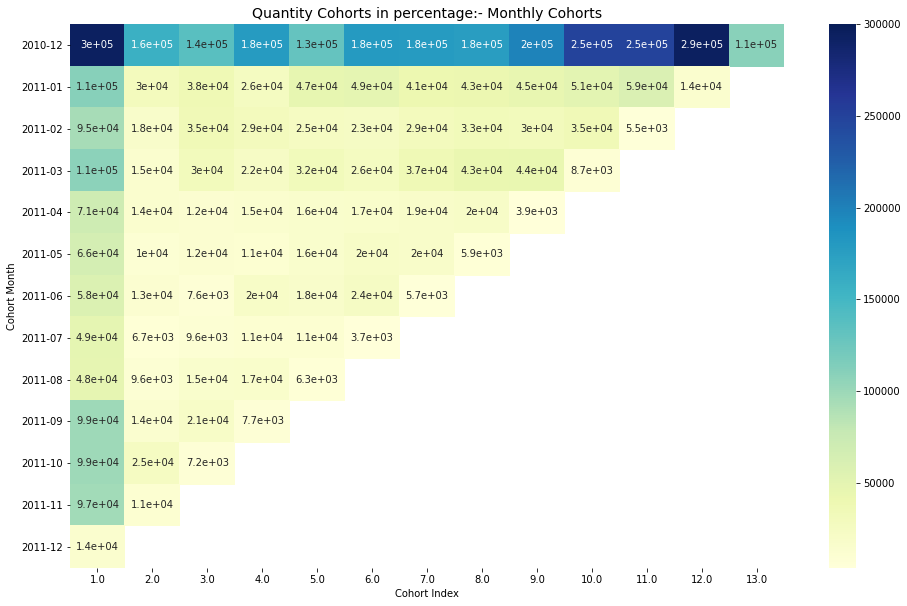

In [ ]:
# Initialize the figure
plt.figure(figsize=(16, 10))

# Adding a title
plt.title('Quantity Cohorts in percentage:- Monthly Cohorts', fontsize = 14)

# Creating the heatmap
sns.heatmap(quantity, annot=True,cmap='YlGnBu', vmin = 3500 , vmax = 300000)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

## 9. Conclusion:
For e-commerce organisations, cohort analysis is a unique opportunity to find out which clients are the most valuable to their business.

by performing Cohort analysis you can get following answers to following questions:

- How much effective was a marketing campaign held in a particular time period.
- Did the strategy employed to improve the conversion rates of Customers worked?
- Should I focus more on retention rather than acquiring new customers?
- Are my customer nurturing strategies effective?
- Is there a seasonality pattern in Customer behahiour?

#### In this Cohort Analysis we have learnt about:
- Customer Segmentation and it's importance
- Different attributes used for Customer Segmentation 
- Cohort Analysis and It's Advantages
- Application of Cohort Analysis
- Creating Cohort Charts for different business metrics and Analysing them in order to generate insights.

